In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from utils import *
import math
import copy
import matplotlib.pyplot as plt

In [35]:
train_data = pd.read_csv("Gotem Pumpkins.csv")
test_data = pd.read_csv("Freyja_Pumpkins.csv")

print(train_data.head())
print("TEST DATA")
print(test_data.head())

   Unnamed: 0    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  \
0           0   84930   1204.448           508.7883           213.0266   
1           1  103343   1275.261           521.4694           252.8941   
2           2   98350   1269.539           526.2346           238.4702   
3           3   69517   1059.538           429.8407           206.8250   
4           4   80011   1182.947           501.9065           204.7531   

   Convex_Area  Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  \
0        85665        328.8407        0.9081    0.9914  0.5482     0.7357   
1       104156        362.7401        0.8745    0.9922  0.7457     0.7985   
2        99184        353.8688        0.8914    0.9916  0.5919     0.7668   
3        70493        297.5093        0.8766    0.9862  0.6623     0.7782   
4        80902        319.1758        0.9130    0.9890  0.7374     0.7185   

   Aspect_Ration  Compactness          Class  
0         2.3884       0.6463  Ürgüp Sivrisi 

In [36]:
train_data['Class'] = train_data['Class'].replace({'Ürgüp Sivrisi': 1, 'Çerçevelik': 0})
train_data.head()

/tmp/ipykernel_21594/1014334263.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Class'] = train_data['Class'].replace({'Ürgüp Sivrisi': 1, 'Çerçevelik': 0})


,Unnamed: 0,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,1
1,1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,1
2,2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,1
3,3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,0
4,4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


## Extracting Features and Target Variable

In [37]:
X_train = train_data.drop(columns='Class').values
y_train = train_data['Class'].values

X_test = test_data.drop(columns='Class').values
y_test = test_data['Class'].values

In [38]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (2000, 13)
The shape of y_train is: (2000,)
We have m = 2000 training examples


## Visualization

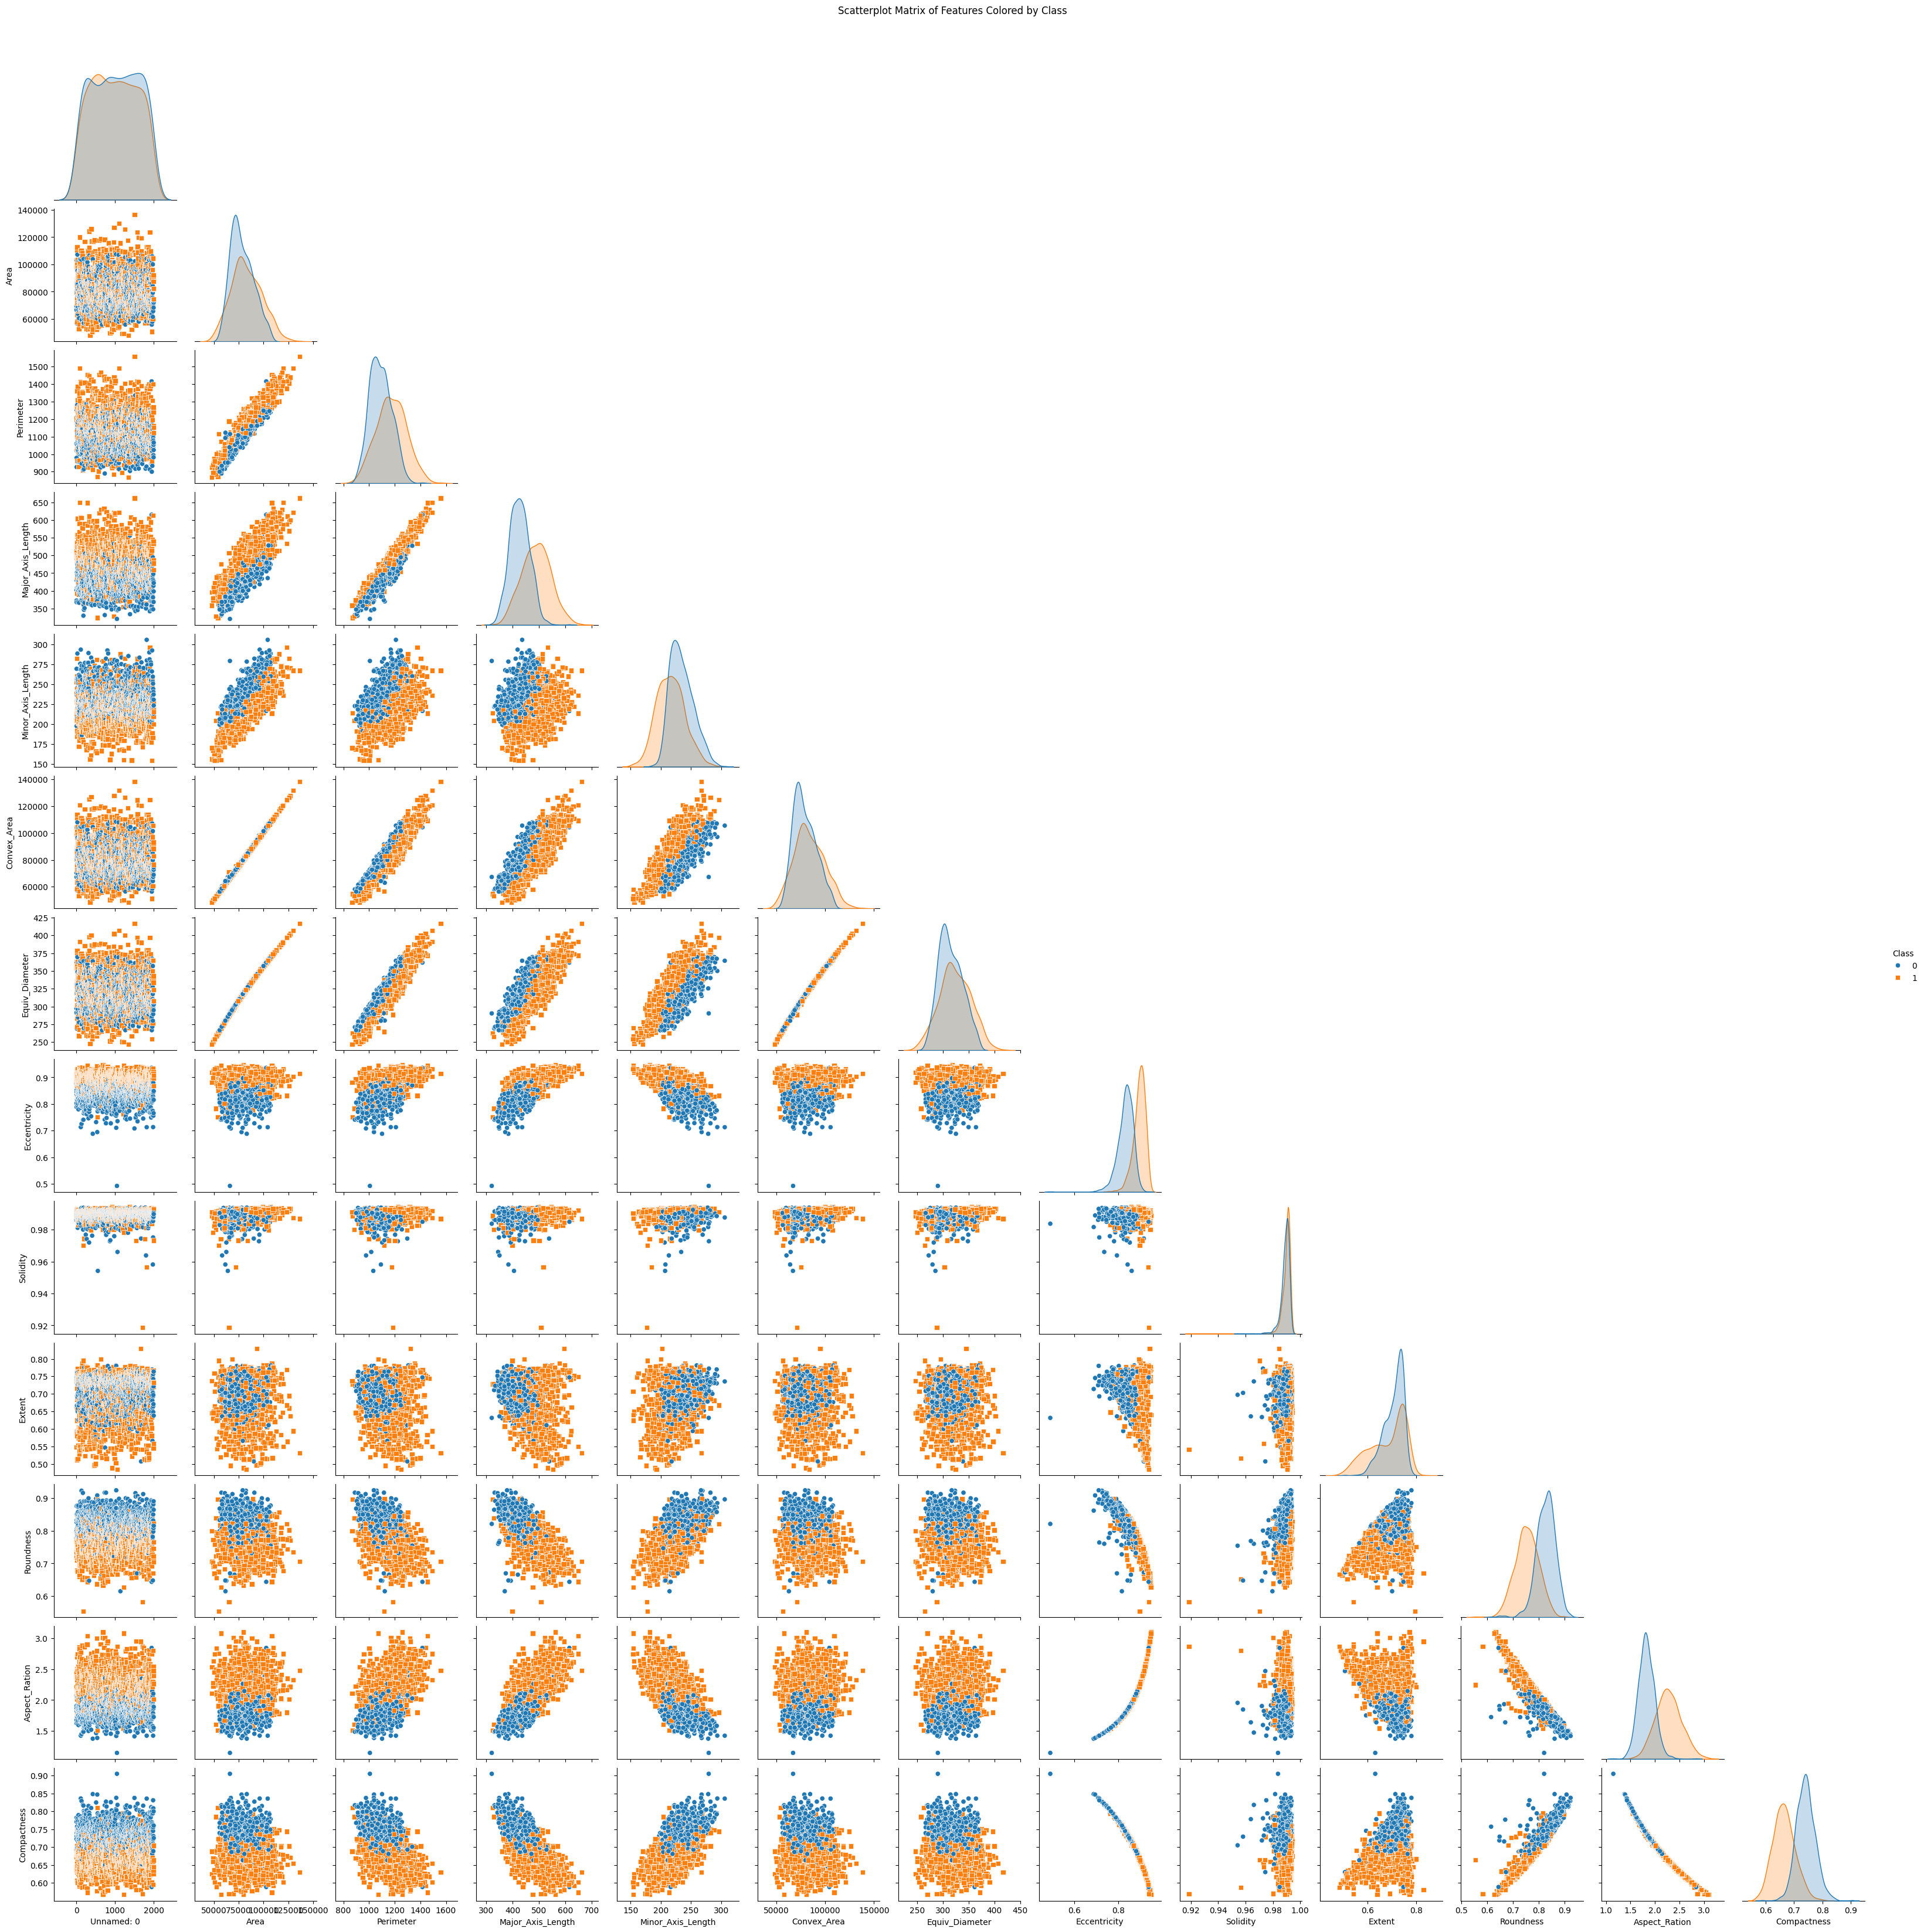

In [39]:
sns.pairplot(train_data, hue="Class", diag_kind="kde", corner=True, markers=["o", "s"])
plt.suptitle("Scatterplot Matrix of Features Colored by Class", y=1.02)  # Adjust the title position
plt.show()

## Normalization

Normalization is done to bring all the data to similarscale, eliminating mathematical disparity

In [40]:
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)

X_train = (X_train - X_train_min) / (X_train_max - X_train_min)
X_test = (X_test - X_train_min) / (X_train_max - X_train_min)

Defining Sigmoid functon:

In [41]:
def sigmoid(z):
    g = 1/(1 + np.exp(-z))
    return g

In [42]:

#defining function to compute total cost of all iterations
def compute_cost_reg_logistic(X, y, w, b, lambda_ = 1):
    m,n  = X.shape

    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)

    cost_without_reg = cost/m

    reg_cost = 0
    for j in range(n):
        reg_cost+= (w[j]**2)

    reg_cost = (lambda_/(2*m))*reg_cost

    total_cost = cost_without_reg + reg_cost
    
    return total_cost

In [43]:
def compute_gradient_reg(X, y, w, b, lambda_): 
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0

    for i in range(m):
        f_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_i - y[i]
        for j in range(n):
            dj_dw[j] += (err_i * X[i, j]) / m + (lambda_ / m) * w[j]
        dj_db += err_i / m
    
    return dj_db, dj_dw

In [44]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in -= alpha * dj_dw               
        b_in -= alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [45]:
# Initialize fitting parameters
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])

np.random.seed()
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.03

w,b, J_history,w_history = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg_logistic, compute_gradient_reg, 
                                    alpha, iterations, lambda_)


Iteration    0: Cost     0.78   
Iteration 1000: Cost     0.68   
Iteration 2000: Cost     0.68   
Iteration 3000: Cost     0.68   
Iteration 4000: Cost     0.67   
Iteration 5000: Cost     0.67   
Iteration 6000: Cost     0.67   
Iteration 7000: Cost     0.67   
Iteration 8000: Cost     0.67   
Iteration 9000: Cost     0.67   
Iteration 9999: Cost     0.67   


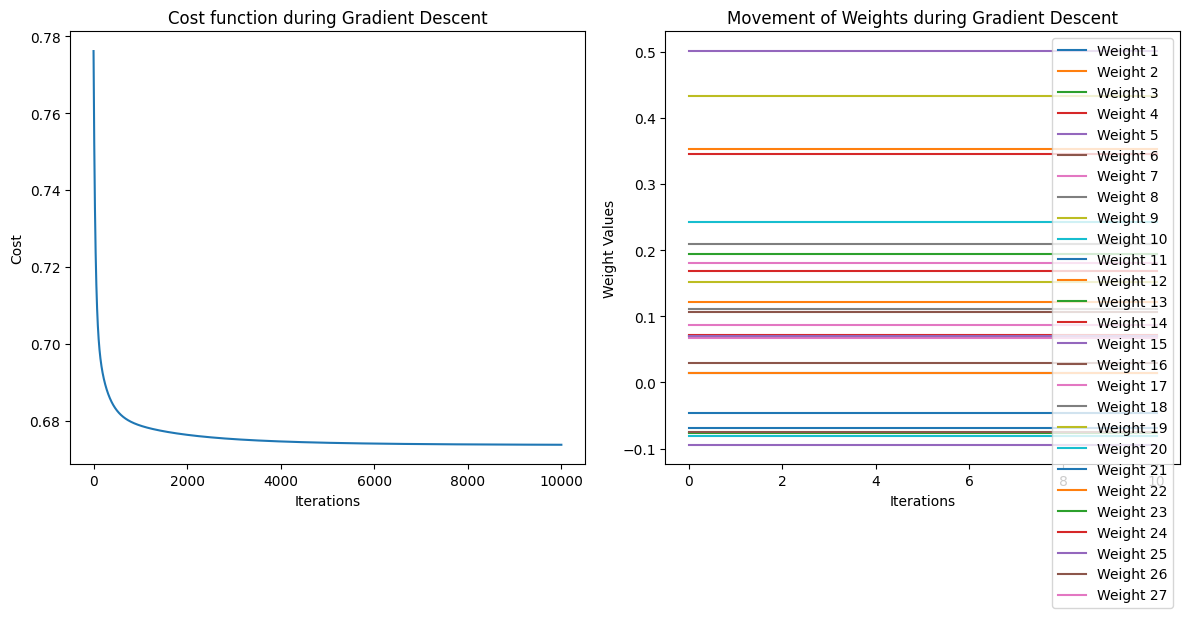

In [46]:
# Plot the cost function
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function during Gradient Descent')

# Plot the trajectory of the weights
plt.subplot(1, 2, 2)
w_history_array = np.array(w_history)
for i in range(w_history_array.shape[1]):  # Iterate through all weights
    plt.plot(range(0, len(w_history_array)), w_history_array[:, i], label=f'Weight {i+1}')

plt.xlabel('Iterations')
plt.ylabel('Weight Values')
plt.title('Movement of Weights during Gradient Descent')
plt.legend()

plt.tight_layout()
plt.show()
